<a href="https://colab.research.google.com/github/dajley/Analyzing-Outliers/blob/main/Analyzing_Outliers_with_IQR_and_ZScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Analyzing Impact of Outlier Detection on Predictive Performance of Machine Learning Models
#Research and Code by Dajanique Leysath

In [2]:
#Import libraries

#Pandas is used for data manipulation and analysis
import pandas as pd

#NumPy is used for scientific computing
import numpy as np

#Matplotlib is used for interactive plots
#Pyplot function make changes to figures
import matplotlib.pyplot as plt

#Seabron creates attractive and statistical graphics
import seaborn as sns

#SciPy provides inbuilt functions to calculate Skewness and Kurtosis and Z-Score
import scipy.stats as stats
#from scipy.stats import skew, kurtosis
from scipy.stats import zscore


In [3]:
#Mounts Google Drive to Google Colab
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


In [4]:
#Saves CSV file into dataframe
df = pd.read_csv("/drive/MyDrive/Datasets/Combined County Data Cleansed.csv")
df

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
0,104.9,60.9285,37.1985,49.0635,50.2490,50.8615,7.8580,23.1800,489.1580,0.1835,5.6170,1.3810,34.8855,46.0855
1,59.7,53.1395,31.8545,42.4970,47.2270,46.5050,9.8660,28.0395,447.4045,0.1910,5.8490,2.2715,30.7485,37.6335
2,43.0,60.1670,33.7200,46.9435,52.5145,51.8025,7.5750,23.9520,442.3180,0.2075,6.3380,2.1860,28.4045,44.6370
3,76.8,58.6490,32.1940,45.4220,52.1705,48.8195,8.3395,25.6365,488.8215,0.2055,6.2715,0.7400,30.5045,42.3990
4,94.9,57.2660,34.1885,45.7275,49.0000,47.4995,7.5190,23.1775,396.1995,0.1680,5.1335,2.2735,32.6630,42.4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,117.1,62.7390,36.9900,49.8645,51.3840,42.9890,10.7280,26.8820,511.3620,0.2350,7.1915,0.9650,36.1970,47.0220
282,39.7,60.0255,35.2670,47.6465,48.9125,43.6705,8.9215,23.2990,427.6245,0.1820,5.5765,2.5450,36.7735,44.8625
283,65.1,62.0395,35.7990,48.9195,50.1140,47.6505,10.8985,21.7265,448.2195,0.2285,6.9955,0.7300,34.6885,44.7150
284,98.6,63.8520,40.2650,52.0590,52.7185,51.1560,10.7980,21.0045,418.0985,0.1990,6.0710,2.3815,40.1690,48.5900


# **Explatory Data Analysis (EDA)**

In [5]:
#Shows basic summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Value               286 non-null    float64
 1   Avg Max Temp        286 non-null    float64
 2   Avg Min Temp        286 non-null    float64
 3   Avg Temp            286 non-null    float64
 4   Avg Bare Soil Temp  286 non-null    float64
 5   Avg Turf Soil Temp  286 non-null    float64
 6   Avg Wind Speed      286 non-null    float64
 7   Avg Max Wind Speed  286 non-null    float64
 8   Total Solar Rad     286 non-null    float64
 9   Avg Penman PET      286 non-null    float64
 10  Total Penman PET    286 non-null    float64
 11  Total Rainfall      286 non-null    float64
 12  Avg Dew Point       286 non-null    float64
 13  Avg Wind Chill      286 non-null    float64
dtypes: float64(14)
memory usage: 31.4 KB


In [6]:
#Shows first ten rows of dataset
df.head(10)

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
0,104.9,60.9285,37.1985,49.0635,50.2490,50.8615,7.8580,23.1800,489.1580,0.1835,5.6170,1.3810,34.8855,46.0855
1,59.7,53.1395,31.8545,42.4970,47.2270,46.5050,9.8660,28.0395,447.4045,0.1910,5.8490,2.2715,30.7485,37.6335
2,43.0,60.1670,33.7200,46.9435,52.5145,51.8025,7.5750,23.9520,442.3180,0.2075,6.3380,2.1860,28.4045,44.6370
3,76.8,58.6490,32.1940,45.4220,52.1705,48.8195,8.3395,25.6365,488.8215,0.2055,6.2715,0.7400,30.5045,42.3990
4,94.9,57.2660,34.1885,45.7275,49.0000,47.4995,7.5190,23.1775,396.1995,0.1680,5.1335,2.2735,32.6630,42.4450
5,86.0,58.3285,35.0765,46.7025,48.8065,45.4195,9.1940,24.7650,456.0825,0.1945,5.9380,2.1310,33.8710,42.9830
6,41.0,60.0035,36.3370,48.1705,50.7070,49.0790,9.2575,26.7905,437.1370,0.1910,5.8270,2.0640,34.6745,45.1155
7,56.3,58.9080,36.4330,47.6710,50.7105,50.0910,9.6660,25.4040,457.8330,0.1955,5.9710,2.4680,35.6340,44.8530
8,27.5,65.3490,38.5995,51.9745,53.4775,50.5825,9.3970,24.6430,469.0270,0.2260,6.9170,2.9450,37.0325,49.8755
9,66.7,60.3065,37.1160,48.7115,49.7380,47.5380,10.4655,27.0440,418.6625,0.2105,6.4035,2.6950,33.2895,45.4505


In [7]:
#Checks to see if there are any null values
df.isnull().sum()

,0
Value,0
Avg Max Temp,0
Avg Min Temp,0
Avg Temp,0
Avg Bare Soil Temp,0
Avg Turf Soil Temp,0
Avg Wind Speed,0
Avg Max Wind Speed,0
Total Solar Rad,0
Avg Penman PET,0


In [8]:
#Shows how many unique values are in each feature
df.nunique()

,0
Value,250
Avg Max Temp,198
Avg Min Temp,198
Avg Temp,197
Avg Bare Soil Temp,197
Avg Turf Soil Temp,197
Avg Wind Speed,194
Avg Max Wind Speed,195
Total Solar Rad,198
Avg Penman PET,132


# **Identifying Data Distribution**

**Descriptive Statistics**: Mean, Median, Standard Deviation, Skewness, and Kurtosis

The **mean** and **median** can help identify the central tendency of the data.

The **standard deviation** indicates how data points are disperced around the central value.

In [9]:
#Shows basic stats on dataset
df.describe()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,94.711538,59.099552,35.918376,47.506944,49.042607,46.393213,9.866484,25.079365,448.886152,0.198280,6.067767,1.883360,34.407533,43.819885
std,35.748752,3.773902,2.773045,3.045846,3.455934,4.063401,1.259208,2.396947,32.467450,0.027049,0.827335,1.055247,3.096325,3.926210
min,25.400000,49.942500,29.261500,40.661500,39.873500,36.401000,7.519000,18.379000,362.750000,0.138500,4.244000,0.192500,26.804500,34.539500
25%,66.300000,56.588000,33.665750,45.205000,46.461250,43.298375,9.031375,23.834875,427.737875,0.180500,5.535125,0.970000,32.714625,40.730250
50%,92.450000,59.881250,35.962750,47.671000,49.115000,46.565250,9.871500,25.149250,446.897000,0.202250,6.168250,1.707250,34.651500,44.318750
75%,120.625000,61.739375,37.861125,49.736500,51.818000,49.457000,10.669875,26.591375,475.160500,0.218500,6.685500,2.514125,36.387750,46.477000
max,198.000000,67.994000,42.368500,54.553000,57.404000,55.556000,14.441500,36.001000,536.538000,0.248500,7.669000,6.194500,42.040500,52.869500


count = amount of rows

mean = average

std = standard deviation

min = minimum value

25% = lower quartile

50% = median

75% = upper quartile

max = maximum value



In [10]:
#Shows the mean of each feature
df.mean()

,0
Value,94.711538
Avg Max Temp,59.099552
Avg Min Temp,35.918376
Avg Temp,47.506944
Avg Bare Soil Temp,49.042607
Avg Turf Soil Temp,46.393213
Avg Wind Speed,9.866484
Avg Max Wind Speed,25.079365
Total Solar Rad,448.886152
Avg Penman PET,0.198280


In [11]:
#Shows the median of each feature
df.median()

,0
Value,92.45000
Avg Max Temp,59.88125
Avg Min Temp,35.96275
Avg Temp,47.67100
Avg Bare Soil Temp,49.11500
Avg Turf Soil Temp,46.56525
Avg Wind Speed,9.87150
Avg Max Wind Speed,25.14925
Total Solar Rad,446.89700
Avg Penman PET,0.20225


In [12]:
#Shows the standard deviation of each feature
df.std()

,0
Value,35.748752
Avg Max Temp,3.773902
Avg Min Temp,2.773045
Avg Temp,3.045846
Avg Bare Soil Temp,3.455934
Avg Turf Soil Temp,4.063401
Avg Wind Speed,1.259208
Avg Max Wind Speed,2.396947
Total Solar Rad,32.467450
Avg Penman PET,0.027049


The **Skewness** measures the asymmetry of the data distribution.

The **Kurtosis** measures the peaakedness or flatness of the distribution.

If Skewness = 0, then **normal distribution**.

mean = median = mode

If Skewness > 0, then **negatively skewed** (or left skewed).  

mean < median < mode

If Skewness < 0, then **positively skewed** (or right skewed).

mean > median > mode

In [13]:
#Calculates the skewness
skew = df.skew()
print(skew)
#print(skew(df)) --> prints the skew values without feature names

Value                 0.318464
Avg Max Temp         -0.258031
Avg Min Temp          0.098246
Avg Temp              0.049892
Avg Bare Soil Temp   -0.137111
Avg Turf Soil Temp   -0.126948
Avg Wind Speed        0.550337
Avg Max Wind Speed    0.434659
Total Solar Rad       0.046374
Avg Penman PET       -0.337436
Total Penman PET     -0.321591
Total Rainfall        0.915102
Avg Dew Point        -0.198629
Avg Wind Chill       -0.087083
dtype: float64


Kurtosis uses Fisher's definition & Excess Kurtosis uses Pearson's definition.

If Kurtosis = 3 or Excess Kurtosis = 0, then **mesokurtic**. (perfectly normal distribution)

If Kurtosis > 3 or Excess Kurtosis > 0, then **leptokurtic**. (sharp peak, heavy tails)

If Kurtosis < 3 or Excess Kurtosis < 0, then **playkurtic**. (flat peak, light tails)

In [14]:
#calculates the kurtosis
kurtosis = df.kurtosis()
print(kurtosis)

Value                -0.309842
Avg Max Temp         -0.405412
Avg Min Temp         -0.623781
Avg Temp             -0.698781
Avg Bare Soil Temp   -0.590043
Avg Turf Soil Temp   -0.544708
Avg Wind Speed        0.817949
Avg Max Wind Speed    2.767803
Total Solar Rad      -0.372088
Avg Penman PET       -0.721769
Total Penman PET     -0.701188
Total Rainfall        0.859633
Avg Dew Point        -0.223580
Avg Wind Chill       -0.532499
dtype: float64


In [15]:
#Shows how correlated each feature is to each other
df.corr()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
Value,1.000000,-0.114121,0.017959,-0.061331,-0.228821,-0.332270,0.027308,0.109507,-0.150490,-0.207645,-0.206967,0.179414,0.136577,-0.067075
Avg Max Temp,-0.114121,1.000000,0.724030,0.949316,0.849990,0.684369,-0.224368,-0.247643,0.290263,0.738079,0.737178,-0.135603,0.382225,0.957011
Avg Min Temp,0.017959,0.724030,1.000000,0.903980,0.606540,0.583659,-0.111692,-0.297559,-0.096499,0.249618,0.249573,0.225344,0.791173,0.858445
Avg Temp,-0.061331,0.949316,0.903980,1.000000,0.803402,0.690781,-0.189896,-0.287289,0.136503,0.571274,0.570678,0.018768,0.596849,0.984258
Avg Bare Soil Temp,-0.228821,0.849990,0.606540,0.803402,1.000000,0.799243,-0.279467,-0.188760,0.319015,0.633735,0.632258,-0.141759,0.301400,0.837696
Avg Turf Soil Temp,-0.332270,0.684369,0.583659,0.690781,0.799243,1.000000,-0.287460,-0.211398,0.214323,0.486544,0.486589,-0.068161,0.245580,0.721284
Avg Wind Speed,0.027308,-0.224368,-0.111692,-0.189896,-0.279467,-0.287460,1.000000,0.647293,-0.093411,0.079313,0.078896,0.215829,-0.033135,-0.317008
Avg Max Wind Speed,0.109507,-0.247643,-0.297559,-0.287289,-0.188760,-0.211398,0.647293,1.000000,0.065805,0.141740,0.136886,0.051453,-0.327432,-0.332997
Total Solar Rad,-0.150490,0.290263,-0.096499,0.136503,0.319015,0.214323,-0.093411,0.065805,1.000000,0.602456,0.609541,-0.464572,-0.285443,0.162490
Avg Penman PET,-0.207645,0.738079,0.249618,0.571274,0.633735,0.486544,0.079313,0.141740,0.602456,1.000000,0.999686,-0.314908,-0.221080,0.579469


# **Visualizations**

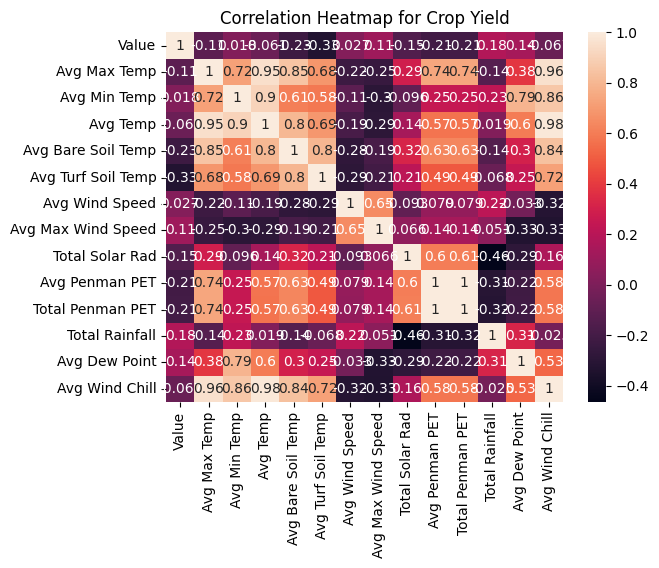

In [16]:
#Shows heatmap of correlation between features
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap for Crop Yield")

#Adjusts size of heatmap
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

Correlation strengths (direction does not matter):

Strong Correlation: x > 0.5

Moderate Correlation: 0.3 < x < 0.5

Weak Correlation: x < 0.3


Which features are most correlated with crop yield?

Moderate Correlation:

- Avg Turf Soil Temp


Weak Correlation:

- Avg Bare Soil Temp

- Avg Penman PET

- Total Penman PET

- Total Rainfall

- Avg Dew Point

- Avg Max Temp

- Avg Max Wind Speed

Are there missing values or outliers in key variables (e.g., soil pH, rainfall)?

Are there interactions between features (e.g., temperature + rainfall)?

<Figure size 1000x1000 with 0 Axes>

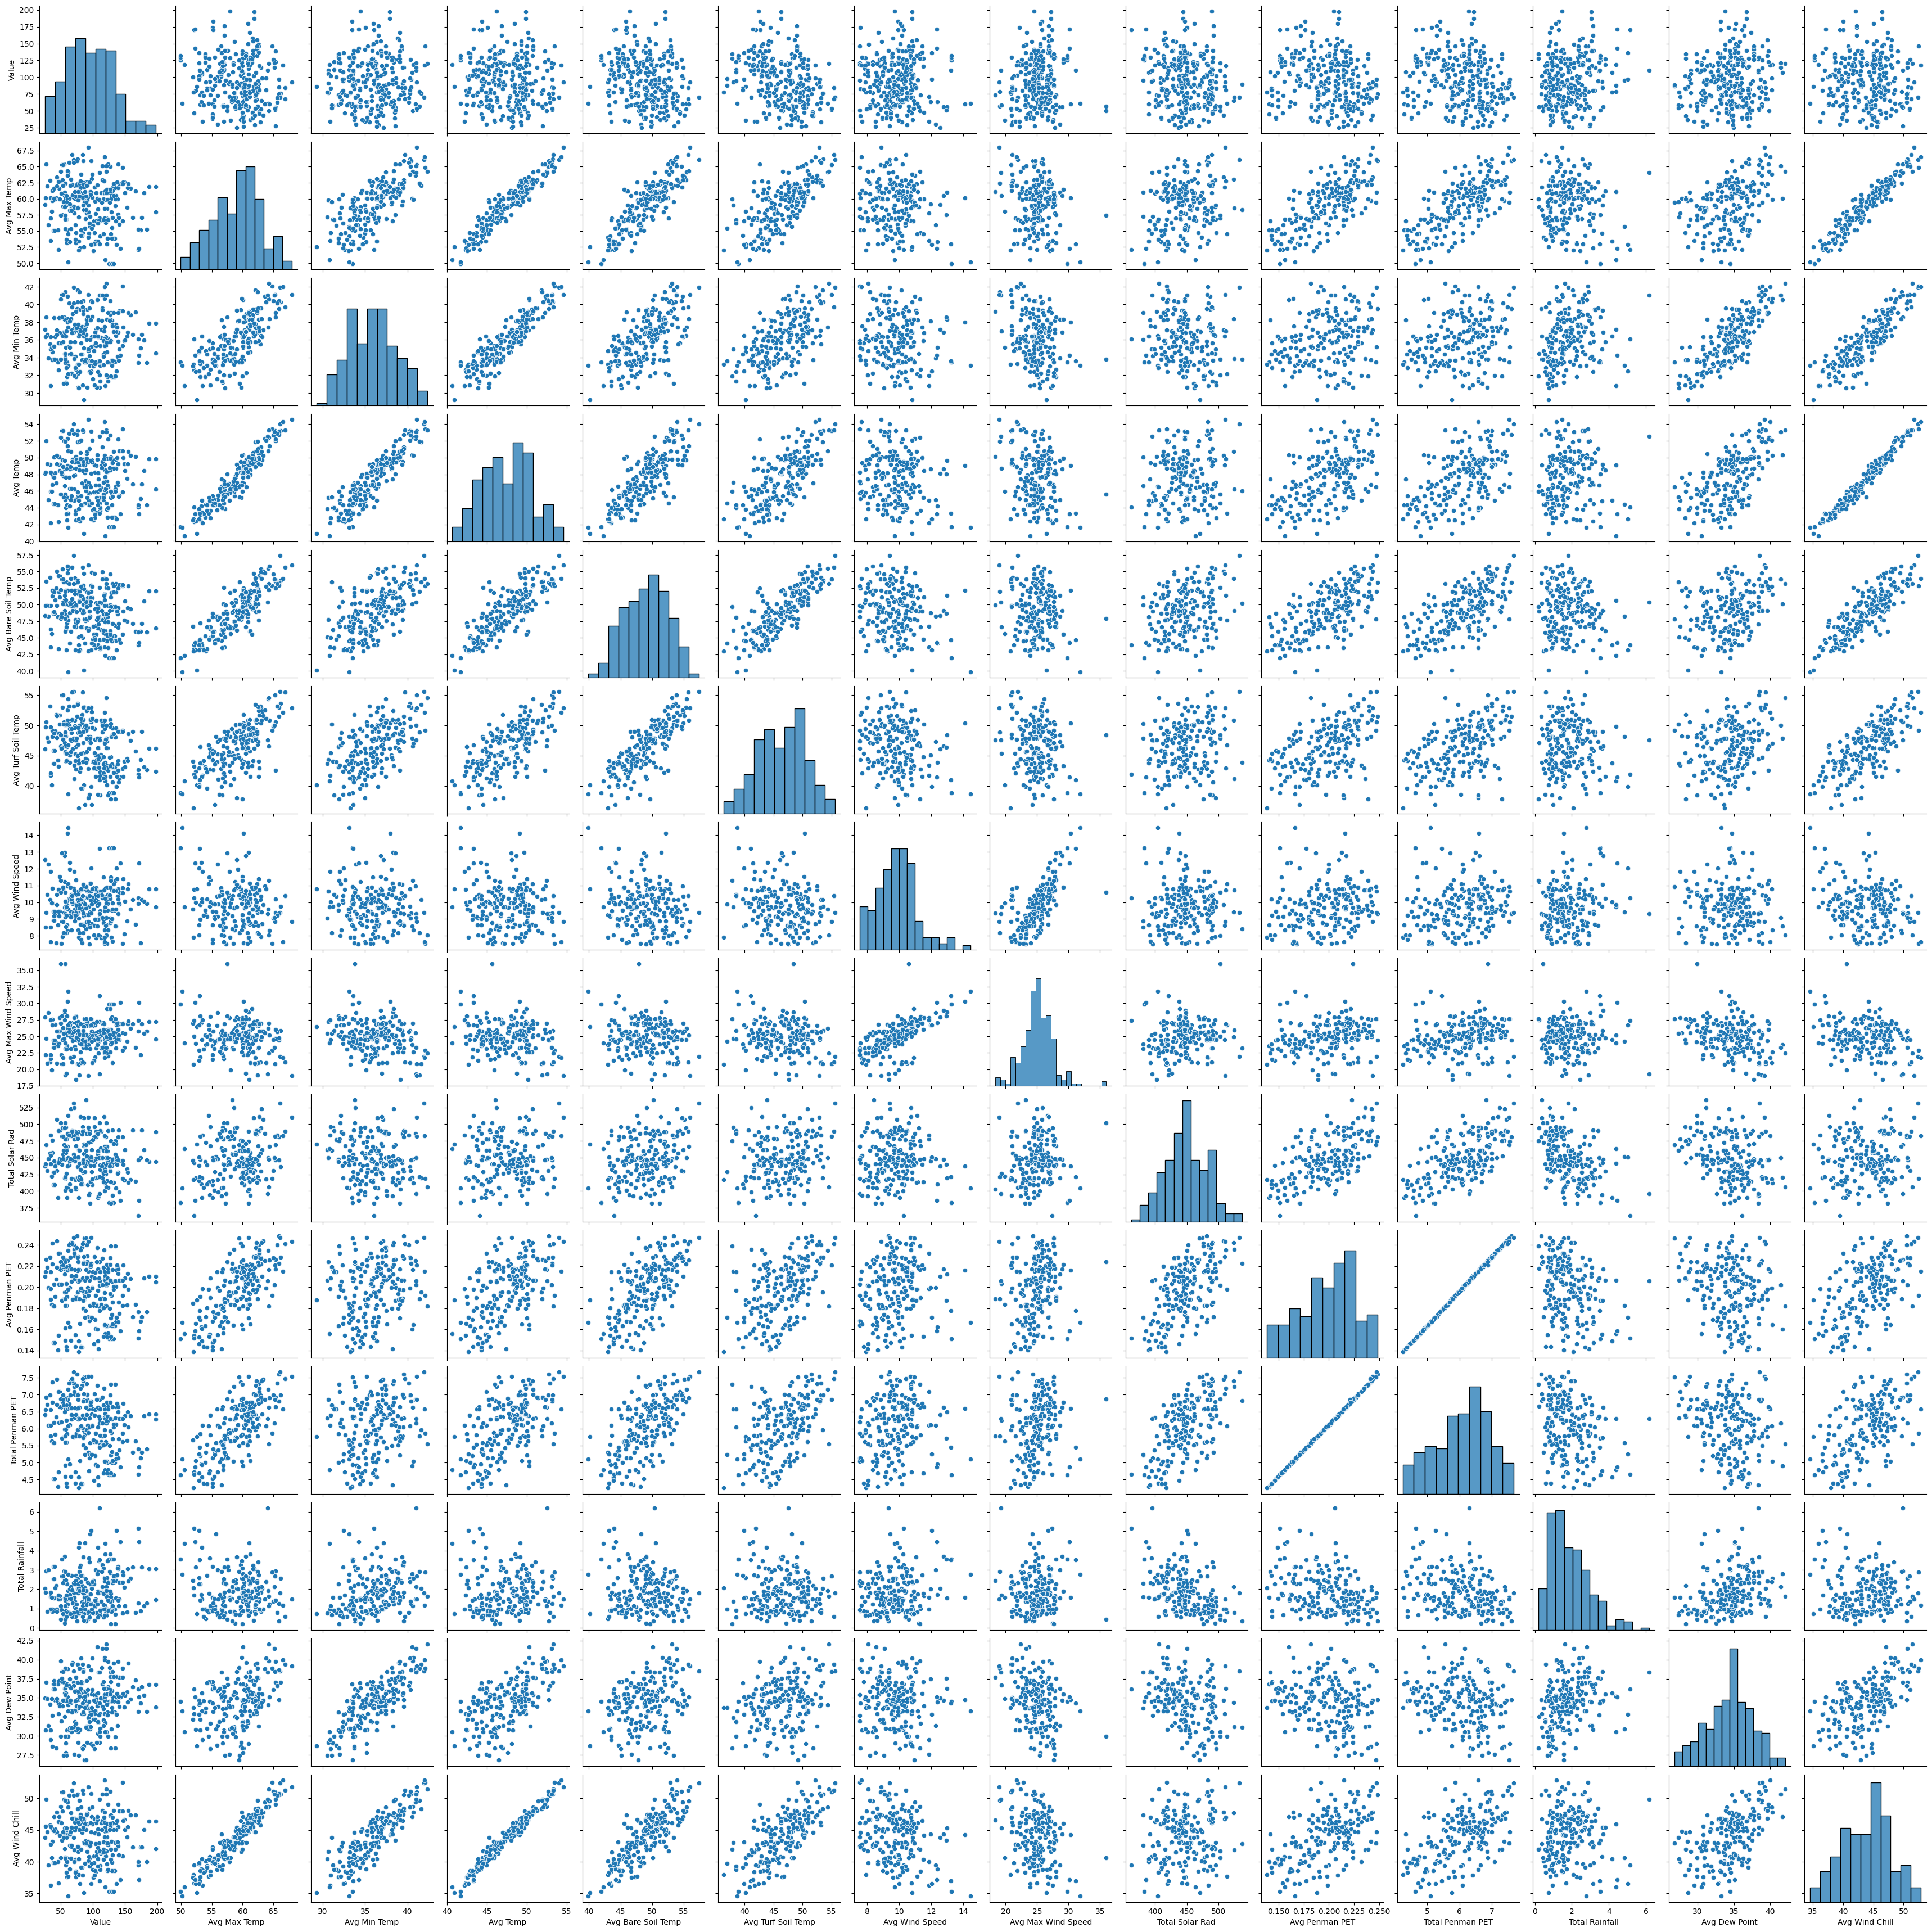

In [17]:
#Shows scatter plot of correlations between features
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()


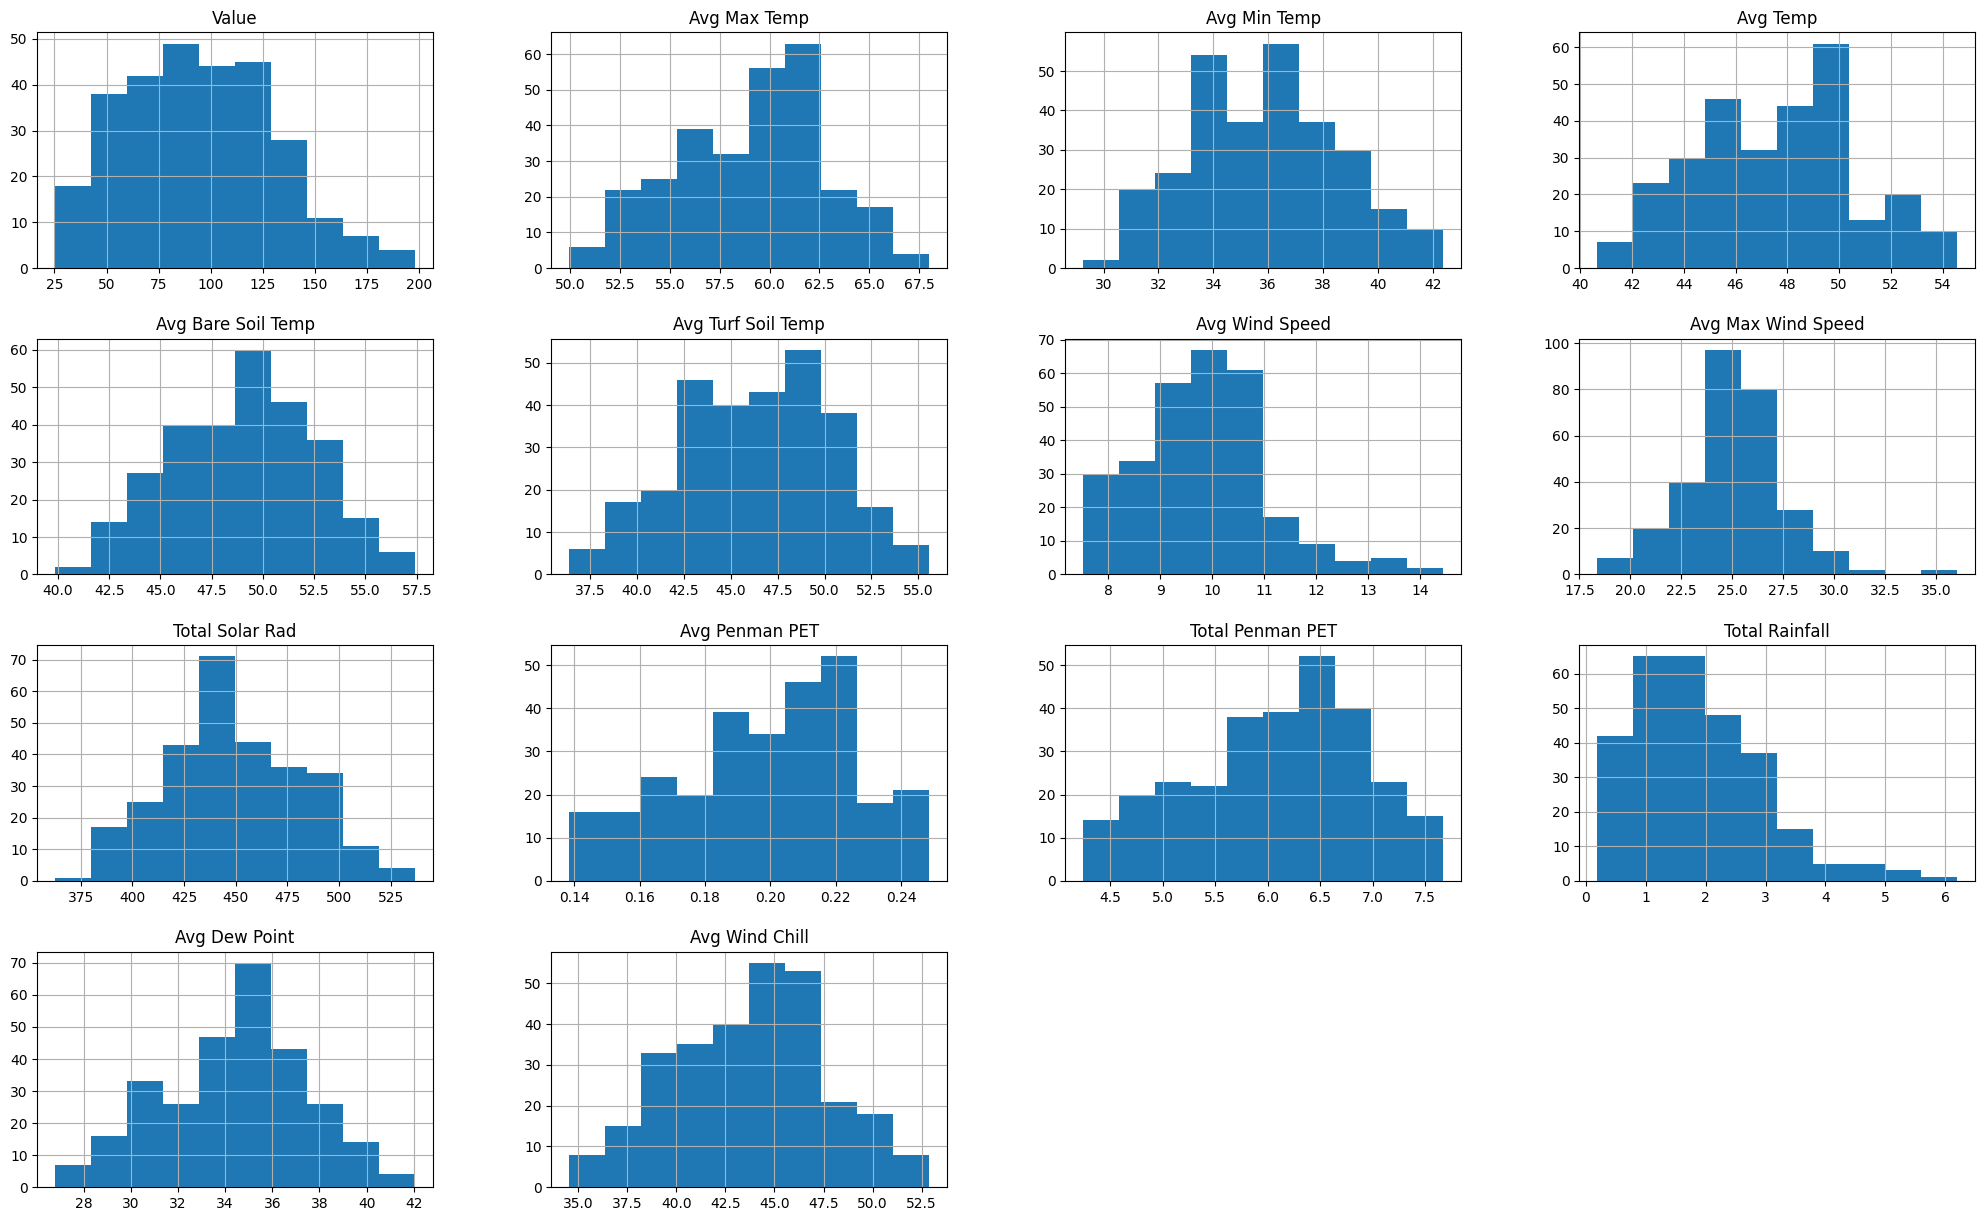

In [18]:
#Shows a histogram for each feature
df.hist(figsize=(25,15))
plt.show()

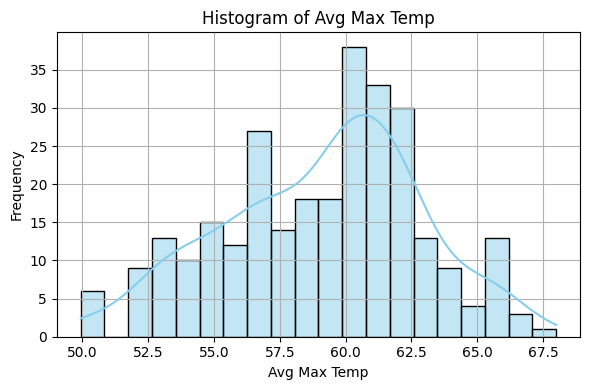

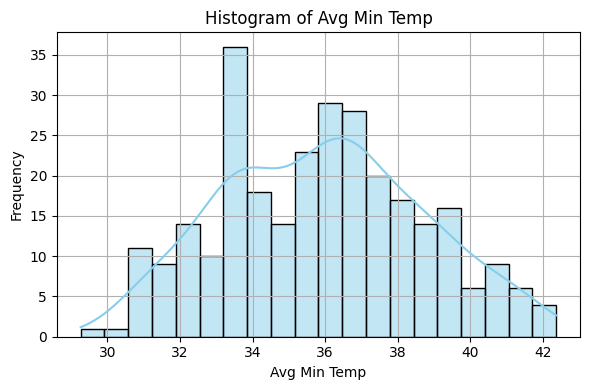

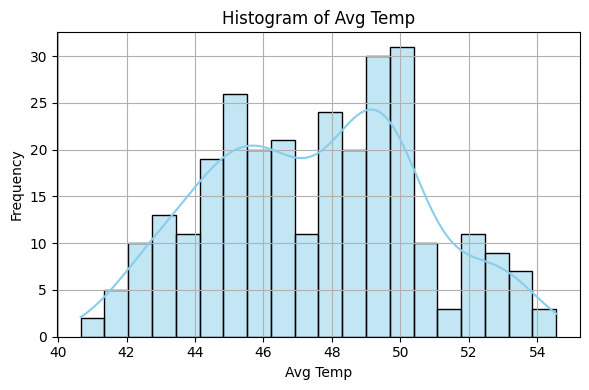

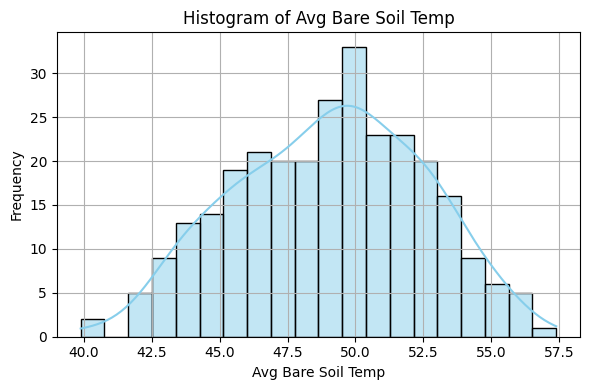

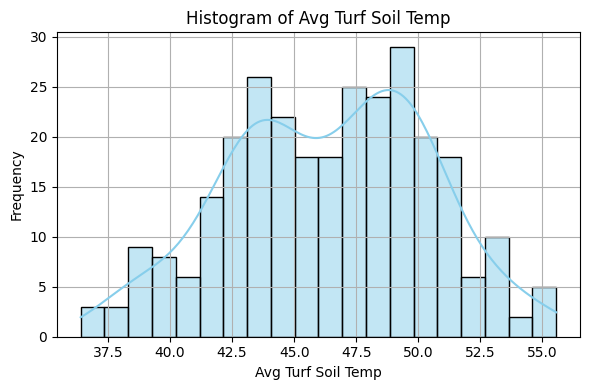

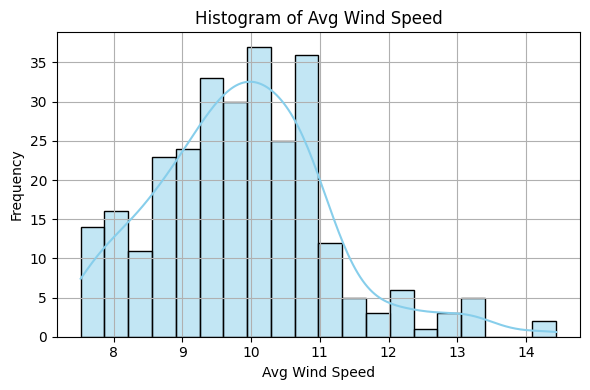

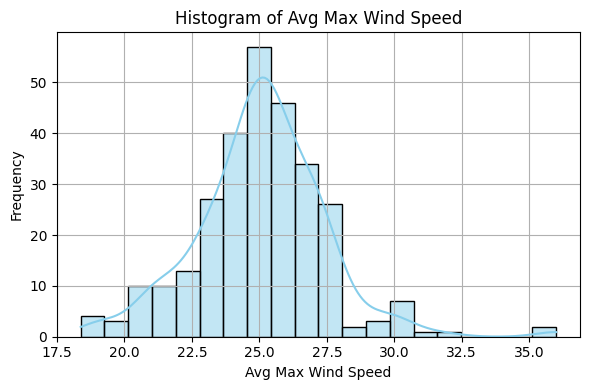

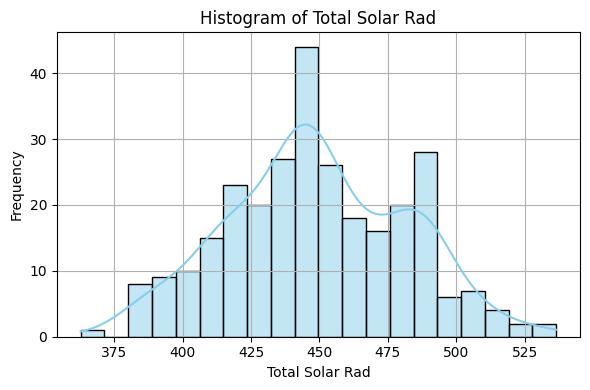

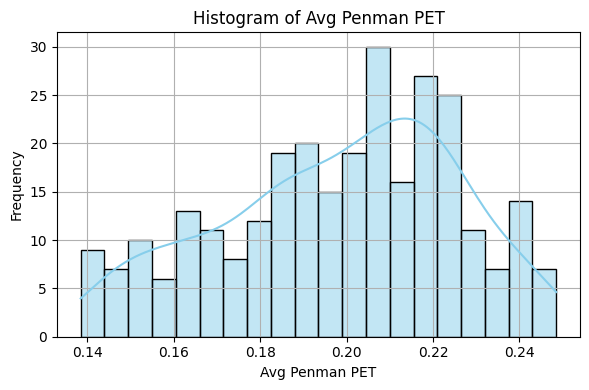

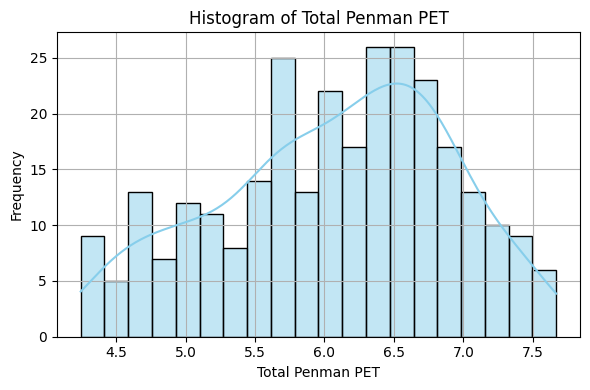

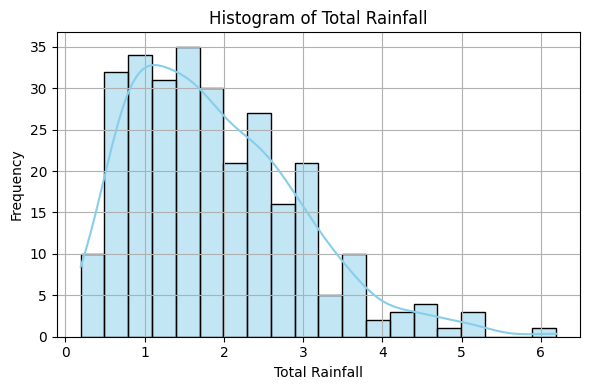

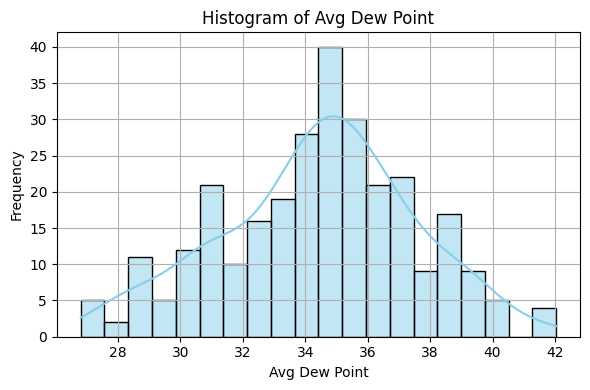

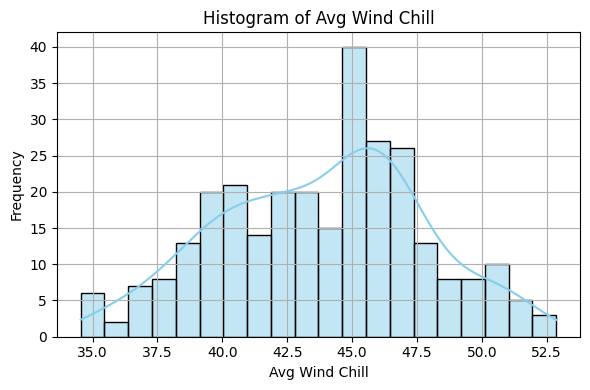

In [19]:
#Shows histogram for each feature compared to the target 'Value'
#Loop is used to go through each feature one by one
features = df.columns[1:14]
#features = df.columns[df.columns != 'Value']  --> excludes target column

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Horizontal axis displays the number range.

Vertical axis (frequency) represents the amount of data present in each range.

# **Outlier Detection**

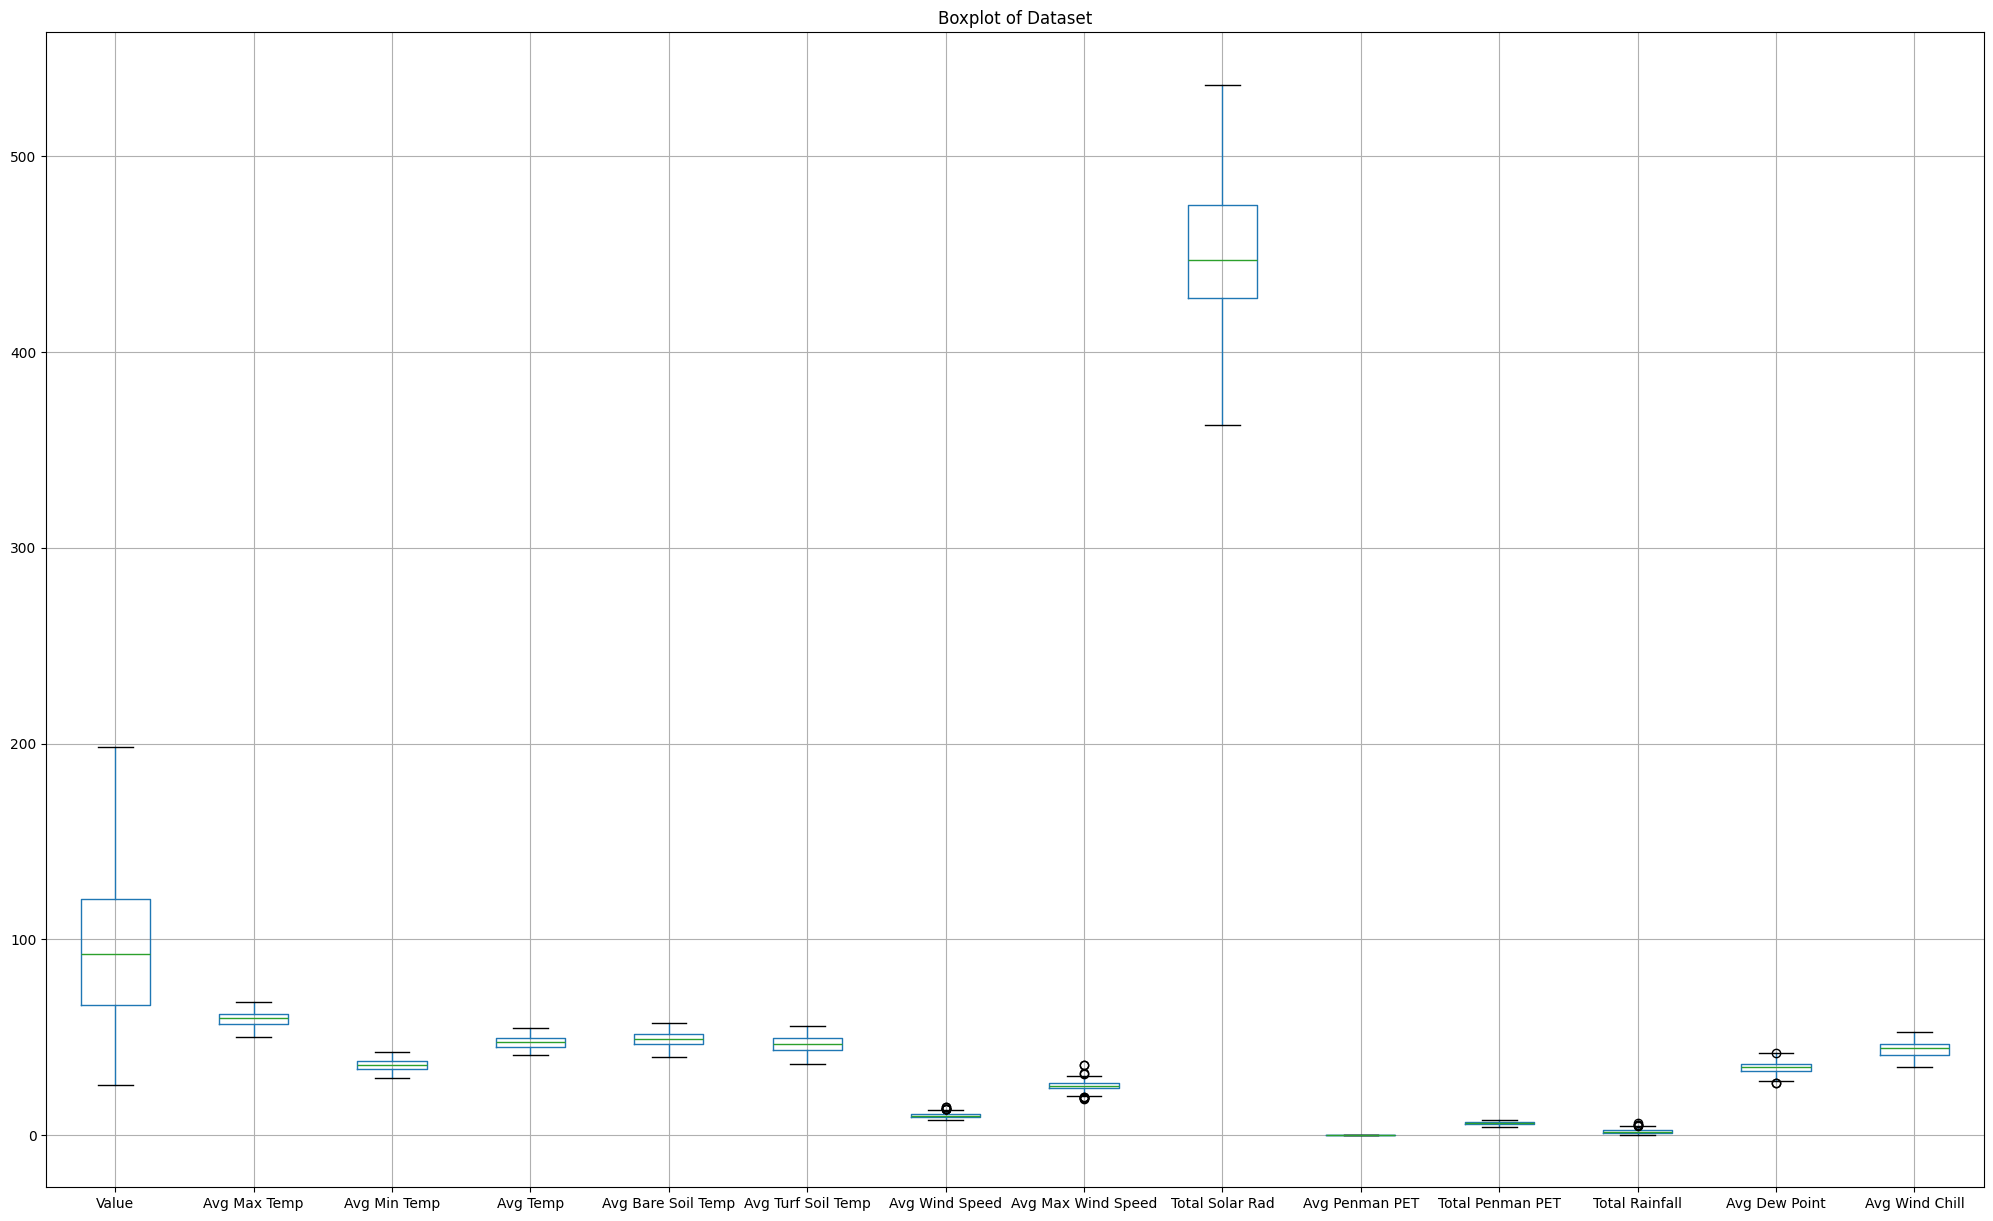

In [20]:
#Shows a boxplot of dataset to detect outliers visually
df.boxplot(figsize=(25,15))
plt.title('Boxplot of Dataset')
plt.show()

In [21]:
#features = df.columns[df.columns != 'Value']  # exclude the target column
"""
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df.columns[0], y=feature, data=df)
    plt.title(f'{feature} Distribution by Target "Value"')
    plt.xlabel(df.columns[0])
    plt.ylabel(feature)
    #plt.grid(True)
    #plt.tight_layout()
    plt.show()
"""

'\nfor feature in features:\n    plt.figure(figsize=(8, 6))\n    sns.boxplot(x=df.columns[0], y=feature, data=df)\n    plt.title(f\'{feature} Distribution by Target "Value"\')\n    plt.xlabel(df.columns[0])\n    plt.ylabel(feature)\n    #plt.grid(True)\n    #plt.tight_layout()\n    plt.show()\n'

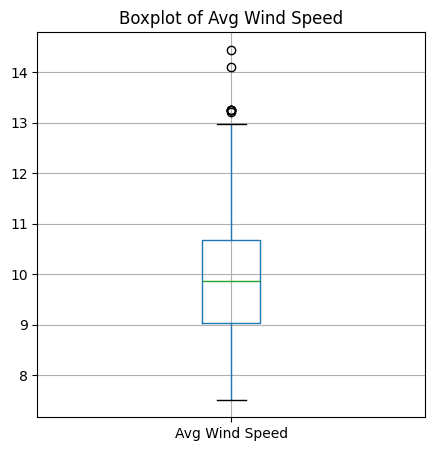

In [22]:
#Boxplot on Avg Wind Speed
df.boxplot(column='Avg Wind Speed', figsize=(5,5))
plt.title('Boxplot of Avg Wind Speed')
plt.show()

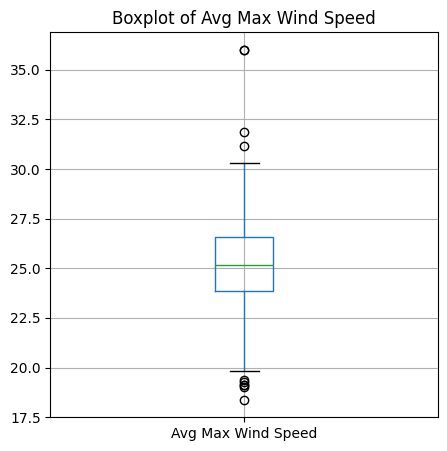

In [23]:
#Boxplot on Avg Max Wind Speed
df.boxplot(column='Avg Max Wind Speed', figsize=(5,5))
plt.title('Boxplot of Avg Max Wind Speed')
plt.show()

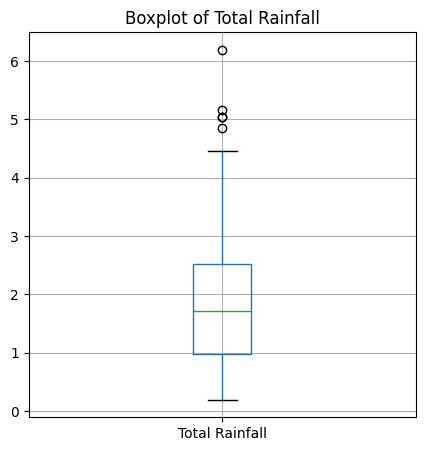

In [24]:
#Boxplot on Total Rainfall
df.boxplot(column='Total Rainfall', figsize=(5,5))
plt.title('Boxplot of Total Rainfall')
plt.show()

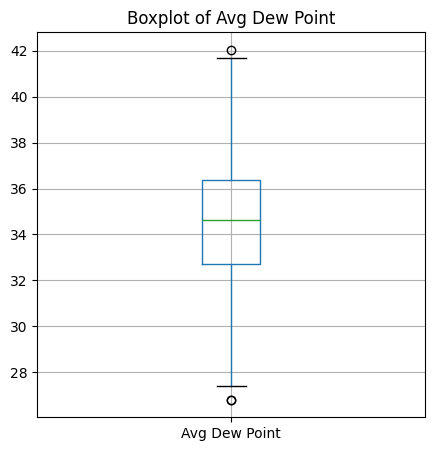

In [25]:
#Boxplot on Avg Dew Point
df.boxplot(column='Avg Dew Point', figsize=(5,5))
plt.title('Boxplot of Avg Dew Point')
plt.show()

**Interquartile Range (IQR)** method identifies outliers by measuring the spread between the first quartile (Q1) and third quartile (Q3). Any data point below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.

This is the most commonly used and most trusted approach used in the research field.

In [27]:
# Uses IQR to detect outliers for Avg Wind Speed
Q1 = np.percentile(df['Avg Wind Speed'], 25, method='midpoint')
Q3 = np.percentile(df['Avg Wind Speed'], 75, method='midpoint')
IQR = Q3 - Q1
print("IQR:", IQR)

# Above Upper bound for Avg Wind Speed
upper = Q3+1.5*IQR
upper_array = np.array(df['Avg Wind Speed'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound for Avg Wind Speed
lower = Q1-1.5*IQR
lower_array = np.array(df['Avg Wind Speed'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

IQR: 1.6364999999999998
Upper Bound: 13.124500000000001
7
Lower Bound: 6.578500000000001
0


In [28]:
# Uses IQR to detect outliers for Avg Max Wind Speed
Q1 = np.percentile(df['Avg Max Wind Speed'], 25, method='midpoint')
Q3 = np.percentile(df['Avg Max Wind Speed'], 75, method='midpoint')
IQR = Q3 - Q1
print("IQR:", IQR)

# Above Upper bound for Avg Max Wind Speed
upper = Q3+1.5*IQR
upper_array = np.array(df['Avg Max Wind Speed'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound for Avg Max Wind Speed
lower = Q1-1.5*IQR
lower_array = np.array(df['Avg Max Wind Speed'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

IQR: 2.7439999999999998
Upper Bound: 30.70675
4
Lower Bound: 19.73075
6


In [29]:
# Uses IQR to detect outliers for Total Rainfall
Q1 = np.percentile(df['Total Rainfall'], 25, method='midpoint')
Q3 = np.percentile(df['Total Rainfall'], 75, method='midpoint')
IQR = Q3 - Q1
print("IQR:", IQR)

# Above Upper bound for Total Rainfall
upper = Q3+1.5*IQR
upper_array = np.array(df['Total Rainfall'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound for Total Rainfall
lower = Q1-1.5*IQR
lower_array = np.array(df['Total Rainfall'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

IQR: 1.5287500000000003
Upper Bound: 4.791875000000001
5
Lower Bound: -1.3231250000000003
0


In [30]:
# Uses IQR to detect outliers for Avg Dew Point
Q1 = np.percentile(df['Avg Dew Point'], 25, method='midpoint')
Q3 = np.percentile(df['Avg Dew Point'], 75, method='midpoint')
IQR = Q3 - Q1
print("IQR:", IQR)

# Above Upper bound for Avg Dew Point
upper = Q3+1.5*IQR
upper_array = np.array(df['Avg Dew Point'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound for Avg Dew Point
lower = Q1-1.5*IQR
lower_array = np.array(df['Avg Dew Point'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

IQR: 3.612250000000003
Upper Bound: 41.76437500000001
1
Lower Bound: 27.315374999999996
2


In [26]:
#Creates a new dataframe to manipulate data for IQR Method
df_iqr = df.copy()

In [53]:
#Creates function to detect outliers with IQR Method

def detect_iqr_outliers_column(df_iqr, column_name):
    Q1 = np.percentile(df_iqr[column_name], 25, method='midpoint')
    Q3 = np.percentile(df_iqr[column_name], 75, method='midpoint')
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lower_outliers = df_iqr[column_name] <= lower_bound
    upper_outliers = df_iqr[column_name] >= upper_bound

    outliers_iqr = lower_outliers | upper_outliers

    print(f"IQR for {column_name}: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of lower outliers: {lower_outliers.sum()}")
    print(f"Number of upper outliers: {upper_outliers.sum()}")

    return outliers_iqr  # returns a boolean Series



In [207]:
outlier_mask_iqr = detect_iqr_outliers_column(df_iqr, 'Avg Wind Speed')
# To get the actual outlier rows:
outlier_rows = df_iqr[outlier_mask_iqr]
outlier_rows

IQR for Avg Wind Speed: 1.6364999999999998
Lower Bound: 6.578500000000001
Upper Bound: 13.124500000000001
Number of lower outliers: 0
Number of upper outliers: 7


,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
45,125.3,49.9425,33.5075,41.7250,41.9380,38.8935,13.2530,29.8345,382.9365,0.1510,4.6400,3.548,34.4805,35.3000
49,128.6,49.9425,33.5075,41.7250,41.9380,38.8935,13.2530,29.8345,382.9365,0.1510,4.6400,3.548,34.4805,35.3000
53,129.6,49.9425,33.5075,41.7250,41.9380,38.8935,13.2530,29.8345,382.9365,0.1510,4.6400,3.548,34.4805,35.3000
57,132.4,49.9425,33.5075,41.7250,41.9380,38.8935,13.2530,29.8345,382.9365,0.1510,4.6400,3.548,34.4805,35.3000
83,61.0,50.2010,33.1345,41.6675,39.8735,38.7155,14.4415,31.8685,404.5575,0.1665,5.1000,2.776,33.2825,34.5395
92,60.0,60.1150,37.9965,49.0560,52.1840,50.3860,14.1025,30.3075,437.6230,0.2160,6.5935,1.565,34.6990,44.2185
251,110.0,53.0040,33.6090,43.3070,44.6765,41.0250,13.2205,31.1415,421.1110,0.1775,5.4495,3.517,34.3080,37.0035


In [208]:
outlier_mask_iqr = detect_iqr_outliers_column(df_iqr, 'Avg Max Wind Speed')
# To get the actual outlier rows:
outlier_rows = df_iqr[outlier_mask_iqr]
outlier_rows

IQR for Avg Max Wind Speed: 2.7439999999999998
Lower Bound: 19.73075
Upper Bound: 30.70675
Number of lower outliers: 6
Number of upper outliers: 4


,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
83,61.0,50.2010,33.1345,41.6675,39.8735,38.7155,14.4415,31.8685,404.5575,0.1665,5.1000,2.7760,33.2825,34.5395
122,73.5,61.0645,39.1735,50.1195,49.9370,47.6025,9.3425,18.3790,402.8150,0.1890,5.7725,2.4540,37.6975,46.5635
146,56.8,57.4625,33.7810,45.6220,47.9130,48.4295,10.5850,36.0010,501.9655,0.2240,6.8680,0.4300,29.9440,40.5950
152,56.7,62.4035,41.4350,51.9195,51.9735,48.8495,8.1650,19.1055,421.4925,0.1890,5.7755,2.9065,38.8425,49.6560
177,50.1,57.4625,33.7810,45.6220,47.9130,48.4295,10.5850,36.0010,501.9655,0.2240,6.8680,0.4300,29.9440,40.5950
183,78.9,62.4035,41.4350,51.9195,51.9735,48.8495,8.1650,19.1055,421.4925,0.1890,5.7755,2.9065,38.8425,49.6560
215,58.2,60.4895,36.9715,48.7305,46.6500,45.3160,9.7310,19.3555,426.1145,0.2035,6.2460,1.6900,36.6455,45.3130
216,110.1,64.0375,41.0345,52.5360,50.3900,47.5590,9.3195,19.2625,395.6705,0.2060,6.2960,6.1945,38.3290,49.8875
217,92.5,67.9940,41.1110,54.5530,55.9950,52.8470,8.8520,19.0020,510.5340,0.2430,7.5330,1.4780,39.1650,51.7660
251,110.0,53.0040,33.6090,43.3070,44.6765,41.0250,13.2205,31.1415,421.1110,0.1775,5.4495,3.5170,34.3080,37.0035


In [209]:
outlier_mask_iqr = detect_iqr_outliers_column(df_iqr, 'Total Rainfall')
# To get the actual outlier rows:
outlier_rows = df_iqr[outlier_mask_iqr]
outlier_rows

IQR for Total Rainfall: 1.5287500000000003
Lower Bound: -1.3231250000000003
Upper Bound: 4.791875000000001
Number of lower outliers: 0
Number of upper outliers: 5


,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
24,95.4,55.7010,33.1025,44.402,48.2640,48.160,9.4060,24.2260,451.9825,0.1825,5.5865,4.8550,30.9200,40.6535
186,170.9,52.0810,36.0740,44.078,43.9385,41.918,10.2645,27.3855,362.7500,0.1515,4.6535,5.1585,36.1040,39.4445
216,110.1,64.0375,41.0345,52.536,50.3900,47.559,9.3195,19.2625,395.6705,0.2060,6.2960,6.1945,38.3290,49.8875
226,97.0,52.8815,32.4660,42.674,43.1510,39.903,12.0290,26.7125,450.5080,0.1710,5.2510,5.0360,32.8115,36.5620
262,136.5,52.8815,32.4660,42.674,43.1510,39.903,12.0290,26.7125,450.5080,0.1710,5.2510,5.0360,32.8115,36.5620


In [210]:
outlier_mask_iqr = detect_iqr_outliers_column(df_iqr, 'Avg Dew Point')
# To get the actual outlier rows:
outlier_rows = df_iqr[outlier_mask_iqr]
outlier_rows

IQR for Avg Dew Point: 3.612250000000003
Lower Bound: 27.315374999999996
Upper Bound: 41.76437500000001
Number of lower outliers: 2
Number of upper outliers: 1


,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
135,87.0,59.4595,33.4975,46.4790,47.8030,49.161,10.9310,27.652,469.2775,0.2465,7.5265,1.5665,26.8045,42.8980
166,89.0,59.4595,33.4975,46.4790,47.8030,49.161,10.9310,27.652,469.2775,0.2465,7.5265,1.5665,26.8045,42.8980
201,120.7,64.2605,42.3685,53.3145,53.1385,54.561,8.0405,22.398,406.3445,0.1820,5.5515,1.6250,42.0405,51.4725


**Z-Score** (also known as the Standard Score) method calculates how many standard deviations a data point is from the mean.

Data points with a Z-score greater than 3 or less than -3 are considered outliers.

In [211]:
#Creates a new dataframe to manipulate data for Z-Score Method
df_zscore = df.copy()

In [212]:
#Creates function to detect outliers with Z-Score Method

def detect_zscore_outliers_column(df_zscore, column_name, threshold=3):
    z_scores = zscore(df_zscore[column_name], nan_policy='omit')  # omit NaNs for safety
    outliers_zscore = np.abs(z_scores) > threshold

    print(f"Z-score threshold: {threshold}")
    print(f"Number of outliers in {column_name}: {np.sum(outliers_zscore)}")

    return outliers_zscore  # returns a boolean array (or Series)


In [213]:
# Uses Z-Score to detect outliers for Avg Wind Speed
outlier_mask_zscore = detect_zscore_outliers_column(df_zscore, 'Avg Wind Speed')

# To get the actual outlier rows:
outlier_rows = df_zscore[outlier_mask_zscore]
outlier_rows

Z-score threshold: 3
Number of outliers in Avg Wind Speed: 2


,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
83,61.0,50.201,33.1345,41.6675,39.8735,38.7155,14.4415,31.8685,404.5575,0.1665,5.1000,2.776,33.2825,34.5395
92,60.0,60.115,37.9965,49.0560,52.1840,50.3860,14.1025,30.3075,437.6230,0.2160,6.5935,1.565,34.6990,44.2185


In [214]:
# Uses Z-Score to detect outliers for Avg Max Wind Speed
outlier_mask_zscore = detect_zscore_outliers_column(df_zscore, 'Avg Max Wind Speed')

# To get the actual outlier rows:
outlier_rows = df_zscore[outlier_mask_zscore]
outlier_rows

Z-score threshold: 3
Number of outliers in Avg Max Wind Speed: 2


,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
146,56.8,57.4625,33.781,45.622,47.913,48.4295,10.585,36.001,501.9655,0.224,6.868,0.43,29.944,40.595
177,50.1,57.4625,33.781,45.622,47.913,48.4295,10.585,36.001,501.9655,0.224,6.868,0.43,29.944,40.595


In [215]:
# Uses Z-Score to detect outliers for Total Rainfall
outlier_mask_zscore = detect_zscore_outliers_column(df_zscore, 'Total Rainfall')

# To get the actual outlier rows:
outlier_rows = df_zscore[outlier_mask_zscore]
outlier_rows

Z-score threshold: 3
Number of outliers in Total Rainfall: 2


,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
186,170.9,52.0810,36.0740,44.078,43.9385,41.918,10.2645,27.3855,362.7500,0.1515,4.6535,5.1585,36.104,39.4445
216,110.1,64.0375,41.0345,52.536,50.3900,47.559,9.3195,19.2625,395.6705,0.2060,6.2960,6.1945,38.329,49.8875


In [216]:
# Uses Z-Score to detect outliers for Avg Dew Point
outlier_mask_zscore = detect_zscore_outliers_column(df_zscore, 'Avg Dew Point')

# To get the actual outlier rows:
outlier_rows = df_zscore[outlier_mask_zscore]
outlier_rows

Z-score threshold: 3
Number of outliers in Avg Dew Point: 0


,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill


In [ ]:
def remove_outliers(df, outlier_mask):
    """Remove rows where outlier_mask is True."""
    return df.loc[~outlier_mask].copy()

def replace_outliers_with_mean(df, column_name, outlier_mask):
    """Replace outliers with the mean of non-outlier values."""
    df_copy = df.copy()
    mean_val = df.loc[~outlier_mask, column_name].mean()
    df_copy.loc[outlier_mask, column_name] = mean_val
    return df_copy

def replace_outliers_with_median(df, column_name, outlier_mask):
    """Replace outliers with the median of non-outlier values."""
    df_copy = df.copy()
    median_val = df.loc[~outlier_mask, column_name].median()
    df_copy.loc[outlier_mask, column_name] = median_val
    return df_copy


In [203]:
def handle_outliers(df, column, method='iqr'):
    if method == 'iqr':
        outlier_mask = detect_iqr_outliers_column(df, column)
    elif method == 'zscore':
        outlier_mask = detect_zscore_outliers_column(df, column)
    else:
        raise ValueError("Method must be 'iqr' or 'zscore'")

    # Outliers Removed
    df_removed = df[~outlier_mask].copy()

    # Outliers Replaced with Mean
    df_mean = df.copy()
    mean_val = df[column].mean()
    df_mean.loc[outlier_mask, column] = mean_val

    # Outliers Replaced with Median
    df_median = df.copy()
    median_val = df[column].median()
    df_median.loc[outlier_mask, column] = median_val

    return df_removed, df_mean, df_median